In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'
features = ['Area','Perimeter','Compactness','Length of kernel',
           'Width of kernel','Asymmetry coefficient', 'Length of kernel groove','target']

df = pd.read_csv(path, delimiter=r'[\t]+', header=None, names=features)

df.head()

--2023-02-27 04:45:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.28’

seeds_dataset.txt.2 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-27 04:45:33 (65.2 MB/s) - ‘seeds_dataset.txt.28’ saved [9300/9300]



,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
X, y = df.iloc[:, :-1 ], df.iloc[:, -1]
print('Class labels:', np.unique(y))

# Print number of instances and features
print("Number of instances:", X.shape[0])
print("Number of features:", X.shape[1])



Class labels: [1 2 3]
Number of instances: 210
Number of features: 7


In [ ]:
X_train, X_test, y_train, y_test = \
train_test_split(X,  y, test_size=0.3, stratify= y, random_state=0)

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # prepare marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    if X.shape[1] > 1:  # check if input array has at least two features
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    else:
        x2_min, x2_max = -1, 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if X.shape[1] > 1:  # check if input array has at least two features
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')

In [ ]:
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)
print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])
     

Labels counts in y: [70 70 70]
Labels counts in y_train: [49 49 49]
Labels counts in y_test: [21 21 21]


Performing eigen decomposition and calculating the eigen values and eigen vectors

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n', eigen_vals)

Eigenvalues 
 [4.98127661e+00 1.29867983e+00 6.71183896e-01 7.16986274e-02
 1.90146349e-02 8.36794608e-04 5.25481284e-03]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.44840678  0.00842522]
 [ 0.44566817  0.06764964]
 [ 0.26603311 -0.54988255]
 [ 0.4270008   0.1944445 ]
 [ 0.4345841  -0.14160649]
 [-0.06316244  0.71759726]
 [ 0.39288053  0.34666241]]


Explained variance for the wheatseeds data

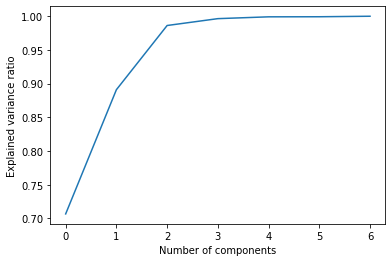

In [ ]:
explained_variance_ratio = eigen_vals / np.sum(eigen_vals)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

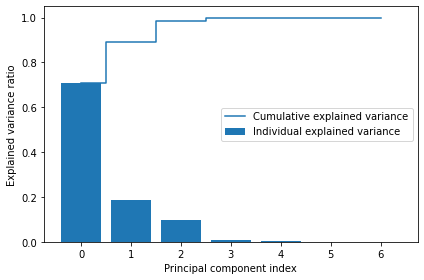

In [ ]:
plt.bar(range(0,7), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(0,7), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

## **PCA**

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca[:, [0, 1]], y_train)

train data

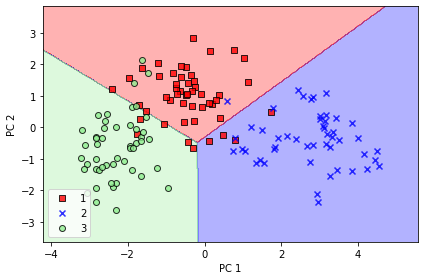

In [ ]:
plot_decision_regions(X_train_pca[:,[0,1]], y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

test data

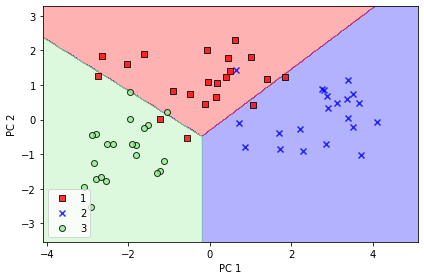

In [ ]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_05.png', dpi=300)
plt.show()

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.70677005 0.18426361]


As we can see, the first principal component accounts for 70.6% of the variation and the second main component for 18.4%. These two main factors account for 89% of the variation.

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

first principle component

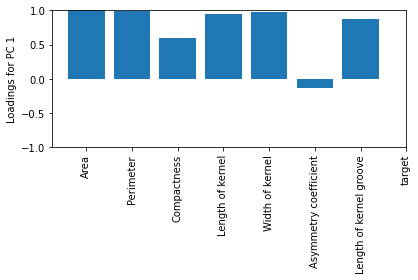

In [ ]:
fig, ax = plt.subplots()

ax.bar(range(0,7), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(0,8))
ax.set_xticklabels(df.columns[0:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

second principle component

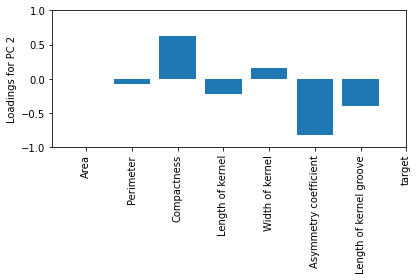

In [ ]:
fig, ax = plt.subplots()

ax.bar(range(0,7), loadings[:, 1], align='center')
ax.set_ylabel('Loadings for PC 2')
ax.set_xticks(range(0,8))
ax.set_xticklabels(df.columns[0:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### **Effect on each feature**

### **LDA**

In [ ]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

train data

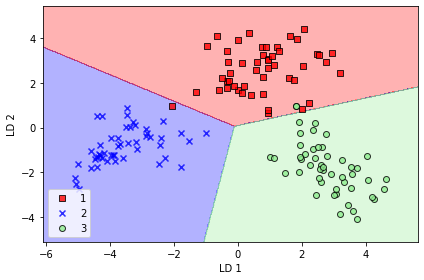

In [ ]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

test data

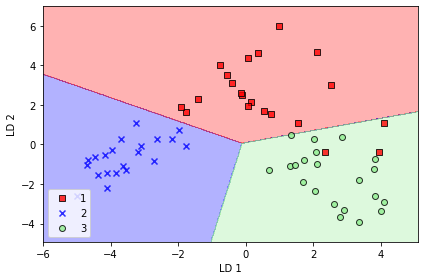

In [ ]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
print("Explained variance ratio:", lda.explained_variance_ratio_)

Explained variance ratio: [0.66521986 0.33478014]


As can be seen, the first discriminant function accounts for 66.5% of the variance whereas the second discriminant function accounts for 33.4%. These two functions explain 99.9% of the variation when combined. 

# **ANSWER: LDA**

By concluding the variance percentages explained by performing PCA and LDA, I choose, PCA as it appears to be a preferable choice for feature transformation in this scenario. The first two major components account for 89% of the overall variance in the data, which is fairly considerable. The first two discriminant functions, on the other hand,  explained 99.9% of the variance, which is considerable

LDA is generally considered better than PCA for tasks such as classification, where the goal is to accurately predict the class labels of new data points.

However, PCA can be more useful for tasks such as visualization, where the goal is to represent the data in a lower-dimensional space while preserving the structure of the data as much as possible

